<a href="https://colab.research.google.com/github/Amit-sheikh/Amit-sheikh/blob/main/amit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (2) (2).zip to archive (2) (2) (1).zip
Files loaded successfully! Total samples: 44898


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

562/562 ━━━━━━━━━━━━━━━━━━━━ 417s 732ms/step - accuracy: 0.9167 - loss: 0.2412 - val_accuracy: 0.9778 - val_loss: 0.0723
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9783 - loss: 0.0749

Final Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.984410
1          Naive Bayes  0.928842
2     LSTM (20 Epochs)  0.977840


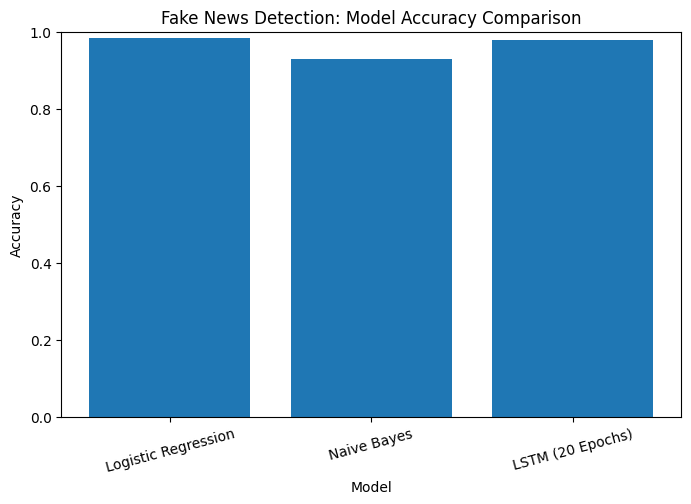

In [ ]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from google.colab import files
import zipfile
import os

# Step 1: Upload Dataset
uploaded = files.upload()  # Select zip or CSV files

# If zip uploaded, extract
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('dataset')
        file_path = 'dataset/'
    else:
        file_path = ''

# Load CSVs (Fake.csv & True.csv must be inside dataset/)
fake = pd.read_csv(os.path.join(file_path, 'Fake.csv'))
true = pd.read_csv(os.path.join(file_path, 'True.csv'))

# Add Labels
fake['label'] = 0
true['label'] = 1

# Combine & Shuffle
df = pd.concat([fake, true]).sample(frac=1, random_state=42).reset_index(drop=True)
X = df['text']
y = df['label']

print("Files loaded successfully! Total samples:", len(df))

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: TF-IDF Vectorization (for ML models)
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train & Evaluate ML Models
results = []

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
results.append(['Logistic Regression', accuracy_score(y_test, y_pred_lr)])





# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
results.append(['Naive Bayes', accuracy_score(y_test, y_pred_nb)])

# Step 5: Prepare LSTM Model
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# LSTM Build
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 6: Train LSTM (20 Epochs)
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=1,   # Fixed to 20 epochs
    batch_size=64,
    verbose=1
)

# Evaluate LSTM
loss, acc = model.evaluate(X_test_pad, y_test)
results.append(['LSTM (20 Epochs)', acc])

# Step 7: Final Comparison Table
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print("\nFinal Model Accuracy Comparison:")
print(df_results)

# Step 8: Visualize Accuracy Comparison
plt.figure(figsize=(8,5))
plt.bar(df_results['Model'], df_results['Accuracy'])
plt.ylim(0,1)
plt.title('Fake News Detection: Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.show()
